<a href="https://colab.research.google.com/github/aditya030/Aditya/blob/master/earthquake_temp_(1)_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data preproccessing

In [ ]:
import numpy as np  
import pandas as pd  
from sklearn import preprocessing;
from sklearn import model_selection;
from sklearn import linear_model;
import os
import datetime as dt
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/all_month (1).csv')#https://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-12-29T02:17:03.610Z,19.179667,-155.503494,32.830002,2.10,md,26.0,230.0,NaN,0.12,...,2022-12-29T02:22:33.730Z,"3 km SW of Pāhala, Hawaii",earthquake,0.77,0.97,2.340000,4.0,automatic,hv,hv
1,2022-12-29T02:16:25.700Z,35.295333,-118.498167,3.690000,1.19,ml,16.0,58.0,0.06342,0.19,...,2022-12-29T02:20:01.646Z,"19km NNW of Tehachapi, CA",earthquake,0.32,0.90,0.172000,11.0,automatic,ci,ci
2,2022-12-29T02:11:19.880Z,36.575333,-121.153168,7.110000,0.98,md,8.0,122.0,0.02620,0.03,...,2022-12-29T02:12:58.760Z,"5km N of Pinnacles, CA",earthquake,0.61,0.78,0.280000,6.0,automatic,nc,nc
3,2022-12-29T02:01:41.460Z,19.222000,-155.389664,31.389999,2.40,ml,45.0,151.0,NaN,0.16,...,2022-12-29T02:07:13.110Z,"9 km ENE of Pāhala, Hawaii",earthquake,0.66,0.81,2.900000,17.0,automatic,hv,hv
4,2022-12-29T02:01:00.860Z,17.950000,-66.967500,10.560000,2.22,md,6.0,212.0,0.07554,0.08,...,2022-12-29T02:13:14.880Z,"6 km WSW of Guánica, Puerto Rico",earthquake,0.48,0.79,0.031461,4.0,reviewed,pr,pr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10464,2022-11-29T02:32:10.145Z,64.763500,-147.860300,21.200000,0.50,ml,NaN,NaN,NaN,0.48,...,2022-12-12T19:46:37.651Z,"6 km SW of South Van Horn, Alaska",earthquake,NaN,0.10,NaN,NaN,reviewed,ak,ak
10465,2022-11-29T02:31:06.740Z,17.971000,-66.839167,17.710000,2.44,md,13.0,198.0,0.03837,0.11,...,2022-11-29T02:57:32.940Z,"3 km SW of Indios, Puerto Rico",earthquake,0.49,0.48,0.063144,6.0,reviewed,pr,pr
10466,2022-11-29T02:30:33.660Z,53.391667,-168.168667,2.460000,0.49,ml,7.0,189.0,NaN,0.17,...,2022-11-30T04:48:08.810Z,"68 km NE of Nikolski, Alaska",earthquake,0.46,0.56,0.223276,7.0,reviewed,av,av
10467,2022-11-29T02:30:25.920Z,19.226999,-155.377335,33.709999,2.02,md,23.0,154.0,NaN,0.10,...,2022-11-29T02:33:42.150Z,"10 km ENE of Pāhala, Hawaii",earthquake,0.83,0.80,NaN,4.0,automatic,hv,hv


                 latitude  longitude     depth       mag       nst       gap  \
latitude         1.000000  -0.438496 -0.176620 -0.552692 -0.304044  0.112808   
longitude       -0.438496   1.000000  0.136276  0.551458  0.338041 -0.084217   
depth           -0.176620   0.136276  1.000000  0.374258  0.244498 -0.038308   
mag             -0.552692   0.551458  0.374258  1.000000  0.540242 -0.081668   
nst             -0.304044   0.338041  0.244498  0.540242  1.000000 -0.399689   
gap              0.112808  -0.084217 -0.038308 -0.081668 -0.399689  1.000000   
dmin            -0.484627   0.371244  0.209110  0.507139  0.216868 -0.029998   
rms              0.088725   0.189147  0.310653  0.480968  0.415314 -0.060181   
horizontalError -0.519684   0.564538  0.547789  0.709558  0.313924  0.060511   
depthError      -0.068558   0.076757  0.069969  0.091526 -0.015999  0.164942   
magError        -0.087957  -0.186507 -0.012898 -0.012006  0.036660  0.072078   
magNst          -0.152626   0.240393  0.

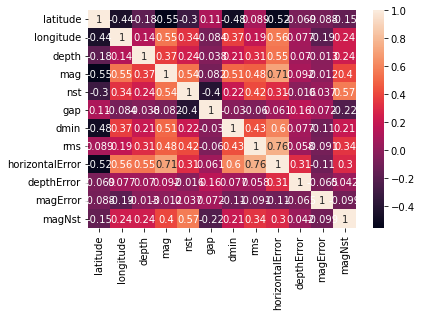

<Figure size 7200x7200 with 0 Axes>

In [ ]:
corr_matrix = df.corr()
print(corr_matrix)

import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(corr_matrix, annot=True)
plt.figure(figsize=(100,100))
plt.show()


Taking only the required part that is place lat long depth mag and place

In [ ]:
df = df[['time', 'latitude', 'longitude', 'depth', 'mag', 'place']]
df_1=df

In [ ]:
df

,time,latitude,longitude,depth,mag,place
0,2022-12-29T02:17:03.610Z,19.179667,-155.503494,32.830002,2.10,"3 km SW of Pāhala, Hawaii"
1,2022-12-29T02:16:25.700Z,35.295333,-118.498167,3.690000,1.19,"19km NNW of Tehachapi, CA"
2,2022-12-29T02:11:19.880Z,36.575333,-121.153168,7.110000,0.98,"5km N of Pinnacles, CA"
3,2022-12-29T02:01:41.460Z,19.222000,-155.389664,31.389999,2.40,"9 km ENE of Pāhala, Hawaii"
4,2022-12-29T02:01:00.860Z,17.950000,-66.967500,10.560000,2.22,"6 km WSW of Guánica, Puerto Rico"
...,...,...,...,...,...,...
10464,2022-11-29T02:32:10.145Z,64.763500,-147.860300,21.200000,0.50,"6 km SW of South Van Horn, Alaska"
10465,2022-11-29T02:31:06.740Z,17.971000,-66.839167,17.710000,2.44,"3 km SW of Indios, Puerto Rico"
10466,2022-11-29T02:30:33.660Z,53.391667,-168.168667,2.460000,0.49,"68 km NE of Nikolski, Alaska"
10467,2022-11-29T02:30:25.920Z,19.226999,-155.377335,33.709999,2.02,"10 km ENE of Pāhala, Hawaii"


In [ ]:
newdf = df['place'].str.split(', ', expand=True) #obly states
newdf

,0,1,2
0,3 km SW of Pāhala,Hawaii,None
1,19km NNW of Tehachapi,CA,None
2,5km N of Pinnacles,CA,None
3,9 km ENE of Pāhala,Hawaii,None
4,6 km WSW of Guánica,Puerto Rico,None
...,...,...,...
10464,6 km SW of South Van Horn,Alaska,None
10465,3 km SW of Indios,Puerto Rico,None
10466,68 km NE of Nikolski,Alaska,None
10467,10 km ENE of Pāhala,Hawaii,None


In [ ]:
df['place'] = newdf[1]
df2=df

<ipython-input-69-0c83933773ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['place'] = newdf[1]


In [ ]:
df


,time,latitude,longitude,depth,mag,place
0,2022-12-29T02:17:03.610Z,19.179667,-155.503494,32.830002,2.10,Hawaii
1,2022-12-29T02:16:25.700Z,35.295333,-118.498167,3.690000,1.19,CA
2,2022-12-29T02:11:19.880Z,36.575333,-121.153168,7.110000,0.98,CA
3,2022-12-29T02:01:41.460Z,19.222000,-155.389664,31.389999,2.40,Hawaii
4,2022-12-29T02:01:00.860Z,17.950000,-66.967500,10.560000,2.22,Puerto Rico
...,...,...,...,...,...,...
10464,2022-11-29T02:32:10.145Z,64.763500,-147.860300,21.200000,0.50,Alaska
10465,2022-11-29T02:31:06.740Z,17.971000,-66.839167,17.710000,2.44,Puerto Rico
10466,2022-11-29T02:30:33.660Z,53.391667,-168.168667,2.460000,0.49,Alaska
10467,2022-11-29T02:30:25.920Z,19.226999,-155.377335,33.709999,2.02,Hawaii


In [ ]:
df = df.sort_values('time', ascending=True)
df

,time,latitude,longitude,depth,mag,place
10468,2022-11-29T02:29:56.560Z,57.763000,-152.277400,50.900000,2.00,Alaska
10467,2022-11-29T02:30:25.920Z,19.226999,-155.377335,33.709999,2.02,Hawaii
10466,2022-11-29T02:30:33.660Z,53.391667,-168.168667,2.460000,0.49,Alaska
10465,2022-11-29T02:31:06.740Z,17.971000,-66.839167,17.710000,2.44,Puerto Rico
10464,2022-11-29T02:32:10.145Z,64.763500,-147.860300,21.200000,0.50,Alaska
...,...,...,...,...,...,...
4,2022-12-29T02:01:00.860Z,17.950000,-66.967500,10.560000,2.22,Puerto Rico
3,2022-12-29T02:01:41.460Z,19.222000,-155.389664,31.389999,2.40,Hawaii
2,2022-12-29T02:11:19.880Z,36.575333,-121.153168,7.110000,0.98,CA
1,2022-12-29T02:16:25.700Z,35.295333,-118.498167,3.690000,1.19,CA


In [ ]:
df['time'] = df['time'].str[0:10]
df3=df
df#splitting time to days/month/year

,time,latitude,longitude,depth,mag,place
10468,2022-11-29,57.763000,-152.277400,50.900000,2.00,Alaska
10467,2022-11-29,19.226999,-155.377335,33.709999,2.02,Hawaii
10466,2022-11-29,53.391667,-168.168667,2.460000,0.49,Alaska
10465,2022-11-29,17.971000,-66.839167,17.710000,2.44,Puerto Rico
10464,2022-11-29,64.763500,-147.860300,21.200000,0.50,Alaska
...,...,...,...,...,...,...
4,2022-12-29,17.950000,-66.967500,10.560000,2.22,Puerto Rico
3,2022-12-29,19.222000,-155.389664,31.389999,2.40,Hawaii
2,2022-12-29,36.575333,-121.153168,7.110000,0.98,CA
1,2022-12-29,35.295333,-118.498167,3.690000,1.19,CA


Taking out places as we will take in plces as final output as latitude longitude is at last places we take means of these places

In [ ]:
df_coords = df[['place', 'latitude', 'longitude']]
df_coords = df_coords.groupby(['place'], as_index=False).mean()
df_coords

,place,latitude,longitude
0,Afghanistan,36.363753,70.819547
1,Alaska,59.534373,-154.075244
2,Aleutian Islands,51.924900,-41.943399
3,Algeria,36.451200,3.116100
4,Antigua and Barbuda,17.671880,-60.947660
...,...,...,...
95,Vanuatu,-15.917953,168.059313
96,Wallis and Futuna,-16.746200,-177.419500
97,Washington,47.083429,-121.886938
98,Wyoming,44.618443,-110.710206


As you can see alaska is -154 in df_cord and -152 in df so we can grp it.

In [ ]:
#inner join the table as place being the point
df = df[['time', 'depth', 'mag', 'place']]#remove long and lat
df = pd.merge(left=df, right=df_coords, how='inner', on=['place'])
df5=df
df

,time,depth,mag,place,latitude,longitude
0,2022-11-29,50.90,2.00,Alaska,59.534373,-154.075244
1,2022-11-29,2.46,0.49,Alaska,59.534373,-154.075244
2,2022-11-29,21.20,0.50,Alaska,59.534373,-154.075244
3,2022-11-29,4.50,1.40,Alaska,59.534373,-154.075244
4,2022-11-29,5.20,1.00,Alaska,59.534373,-154.075244
...,...,...,...,...,...,...
9452,2022-12-27,10.00,4.70,Egypt,28.115100,33.361300
9453,2022-12-27,20.65,4.60,Nepal,28.485900,83.155100
9454,2022-12-28,10.00,4.00,Cyprus,34.690400,32.219200
9455,2022-12-28,10.00,4.10,Malawi,-17.007400,35.468300


We are using rolling windows to take out mean of earthquake over a period of time so that we can predict it 

A common time-series model assumption is that the coefficients are constant with respect to time. Checking for instability amounts to examining whether the coefficients are time-invariant.

In [ ]:
# We will take a rolling window of size 7 as a week is a good number 7,14,21

eq_tmp = df.copy()


# loop through each zone and apply MA
eq_data = []
eq_data_last_days_out = []

for place in list(set(eq_tmp['place'])):
    temp_df = eq_tmp[eq_tmp['place'] == place].copy()
    
    temp_df['Mdep_21'] = temp_df['depth'].rolling(window=21,center=False).mean() 
    temp_df['Mdep_14'] = temp_df['depth'].rolling(window=14,center=False).mean()
    temp_df['Mdep_7'] = temp_df['depth'].rolling(window=7,center=False).mean()
    temp_df['Mmag_21'] = temp_df['mag'].rolling(window=21,center=False).mean() 
    temp_df['Mmag_14'] = temp_df['mag'].rolling(window=14,center=False).mean()
    temp_df['Mmag_7'] = temp_df['mag'].rolling(window=7,center=False).mean()
    temp_df.loc[:, 'mag_outcome'] = temp_df.loc[:, 'Mmag_7'].shift(-9)##donot predict last 8 days as rolling window might be wrong for 28-30
    
    #days to predict value on earth quake data this is not yet seen or witnessed by next 7 days (consider as live next 7 days period)
    
    eq_data_last_days_out.append(temp_df.tail(9))#days we didnot count so we will predict these days

    eq_data.append(temp_df)

eq_data

[            time  depth  mag       place  latitude  longitude  Mdep_21  \
 9411  2022-12-06   10.0  4.5  Mozambique   -16.223    41.6486      NaN   
 
       Mdep_14  Mdep_7  Mmag_21  Mmag_14  Mmag_7  mag_outcome  
 9411      NaN     NaN      NaN      NaN     NaN          NaN  ,
             time  depth  mag              place  latitude  longitude  Mdep_21  \
 9445  2022-12-20   10.0  4.9  Wallis and Futuna  -16.7462  -177.4195      NaN   
 
       Mdep_14  Mdep_7  Mmag_21  Mmag_14  Mmag_7  mag_outcome  
 9445      NaN     NaN      NaN      NaN     NaN          NaN  ,
             time    depth  mag     place  latitude  longitude  Mdep_21  \
 9317  2022-12-02   61.398  4.7  Colombia  6.314443 -75.329943      NaN   
 9318  2022-12-02   27.870  4.3  Colombia  6.314443 -75.329943      NaN   
 9319  2022-12-02   10.000  4.4  Colombia  6.314443 -75.329943      NaN   
 9320  2022-12-12  105.054  4.5  Colombia  6.314443 -75.329943      NaN   
 9321  2022-12-14  156.669  4.5  Colombia  6.3144

In [ ]:
#eq_data.head

In [ ]:

eq_all = pd.concat(eq_data)
eq_all#convert list to dataframe

,time,depth,mag,place,latitude,longitude,Mdep_21,Mdep_14,Mdep_7,Mmag_21,Mmag_14,Mmag_7,mag_outcome
9411,2022-12-06,10.000,4.5,Mozambique,-16.223000,41.648600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9445,2022-12-20,10.000,4.9,Wallis and Futuna,-16.746200,-177.419500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9317,2022-12-02,61.398,4.7,Colombia,6.314443,-75.329943,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9318,2022-12-02,27.870,4.3,Colombia,6.314443,-75.329943,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9319,2022-12-02,10.000,4.4,Colombia,6.314443,-75.329943,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8456,2022-11-29,119.395,4.2,El Salvador,12.974650,-89.364367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8457,2022-12-04,10.000,4.4,El Salvador,12.974650,-89.364367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8458,2022-12-07,66.285,4.2,El Salvador,12.974650,-89.364367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8459,2022-12-17,10.000,4.7,El Salvador,12.974650,-89.364367,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#rolling windows has a lot of NAN from the 1st part removing it
# remove any NaN fields
eq_all=eq_all.dropna()
eq_all

,time,depth,mag,place,latitude,longitude,Mdep_21,Mdep_14,Mdep_7,Mmag_21,Mmag_14,Mmag_7,mag_outcome
8345,2022-12-04,598.917,4.90,Indonesia,-4.326741,120.961696,100.279333,136.627643,169.438429,4.561905,4.592857,4.714286,4.628571
8346,2022-12-04,32.682,4.20,Indonesia,-4.326741,120.961696,101.359429,136.462071,172.678714,4.557143,4.585714,4.685714,4.714286
8347,2022-12-04,10.000,4.10,Indonesia,-4.326741,120.961696,100.043714,131.979857,152.164429,4.528571,4.578571,4.557143,4.585714
8348,2022-12-04,181.210,4.40,Indonesia,-4.326741,120.961696,107.599810,139.505357,151.849143,4.514286,4.585714,4.542857,4.714286
8349,2022-12-04,35.000,4.90,Indonesia,-4.326741,120.961696,108.790286,136.468643,144.460000,4.538095,4.607143,4.614286,4.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4205,2022-12-28,30.750,2.17,Hawaii,19.323136,-155.432647,24.382857,27.697143,26.832857,2.083333,2.123571,2.011429,1.982857
4206,2022-12-28,32.930,2.61,Hawaii,19.323136,-155.432647,26.001429,27.895000,27.168571,2.117143,2.141429,2.107143,1.952857
4207,2022-12-28,3.340,2.00,Hawaii,19.323136,-155.432647,25.740000,26.018571,23.385714,2.095714,2.155000,2.131429,1.952857
4208,2022-12-28,4.040,2.13,Hawaii,19.323136,-155.432647,24.335714,24.016429,19.604286,2.110476,2.166429,2.152857,2.037143


In [ ]:
eq_data_last_days_out = pd.concat(eq_data_last_days_out)



In [ ]:
eq_data_last_days_out


,time,depth,mag,place,latitude,longitude,Mdep_21,Mdep_14,Mdep_7,Mmag_21,Mmag_14,Mmag_7,mag_outcome
9411,2022-12-06,10.000,4.5,Mozambique,-16.223000,41.648600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9445,2022-12-20,10.000,4.9,Wallis and Futuna,-16.746200,-177.419500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9317,2022-12-02,61.398,4.7,Colombia,6.314443,-75.329943,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9318,2022-12-02,27.870,4.3,Colombia,6.314443,-75.329943,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9319,2022-12-02,10.000,4.4,Colombia,6.314443,-75.329943,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8456,2022-11-29,119.395,4.2,El Salvador,12.974650,-89.364367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8457,2022-12-04,10.000,4.4,El Salvador,12.974650,-89.364367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8458,2022-12-07,66.285,4.2,El Salvador,12.974650,-89.364367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8459,2022-12-17,10.000,4.7,El Salvador,12.974650,-89.364367,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
eq_data_last_days_out = eq_data_last_days_out[np.isfinite(eq_data_last_days_out['Mmag_21'])]
eq_data_last_days_out

,time,depth,mag,place,latitude,longitude,Mdep_21,Mdep_14,Mdep_7,Mmag_21,Mmag_14,Mmag_7,mag_outcome
8422,2022-12-25,33.194000,4.40,Indonesia,-4.326741,120.961696,63.595857,65.322286,68.190429,4.552381,4.514286,4.500000,NaN
8423,2022-12-26,184.336000,4.20,Indonesia,-4.326741,120.961696,71.893190,77.782000,74.623286,4.528571,4.514286,4.500000,NaN
8424,2022-12-26,32.313000,4.50,Indonesia,-4.326741,120.961696,64.366286,73.253500,74.239429,4.533333,4.521429,4.471429,NaN
8425,2022-12-26,36.284000,4.70,Indonesia,-4.326741,120.961696,64.427429,72.006357,58.659857,4.523810,4.542857,4.514286,NaN
8426,2022-12-27,124.160000,4.50,Indonesia,-4.326741,120.961696,64.336619,79.184571,67.804857,4.533333,4.528571,4.500000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4214,2022-12-28,1.780000,1.78,Hawaii,19.323136,-155.432647,22.290476,19.110000,14.834286,2.097619,2.057143,1.982857,NaN
4215,2022-12-29,29.030001,1.92,Hawaii,19.323136,-155.432647,22.145714,19.004286,18.404286,2.095238,2.052857,1.952857,NaN
4216,2022-12-29,32.349998,2.16,Hawaii,19.323136,-155.432647,22.170952,19.077857,22.482857,2.104762,2.065714,1.952857,NaN
4217,2022-12-29,31.389999,2.40,Hawaii,19.323136,-155.432647,22.056667,21.075714,22.638571,2.126190,2.075000,2.037143,NaN


In [ ]:
eq_all['mag_outcome'].value_counts()

1.428571    27
1.285714    26
1.214286    26
1.357143    26
1.571429    25
            ..
2.532857     1
2.484286     1
2.725714     1
2.810000     1
2.070000     1
Name: mag_outcome, Length: 3158, dtype: int64

In [ ]:
#considered magnitude above 2.5 as dangerous hence prediction outcome as '1' elso '0'.
eq_all['mag_outcome'] = np.where(eq_all['mag_outcome'] > 2.5, 1,0)
eq_all['mag_outcome'].value_counts()

<ipython-input-83-83cfda7d5cbe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eq_all['mag_outcome'] = np.where(eq_all['mag_outcome'] > 2.5, 1,0)


0    8002
1     307
Name: mag_outcome, dtype: int64

In [ ]:
#therefore although data is 95% 0 and 5% 1

In [ ]:
df_features=eq_all

In [ ]:
# splitting traing and testing dataset with trainging size = 70% and test = 30%
req=['depth','Mdep_21','Mdep_14','Mdep_7','Mmag_21','Mmag_14','Mmag_7']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features[req], df_features['mag_outcome'], test_size=0.3, random_state=42)

In [ ]:
X_train

,depth,Mdep_21,Mdep_14,Mdep_7,Mmag_21,Mmag_14,Mmag_7
1744,33.100000,28.815714,31.216429,37.014286,1.589524,1.605714,1.500000
2038,6.250000,31.213905,23.436571,10.746000,1.759048,1.452857,1.148571
7722,6.676147,6.718295,7.244972,8.026009,2.680952,2.850000,2.971429
1300,99.800000,39.252381,44.478571,52.357143,1.576190,1.671429,1.571429
5463,4.150000,5.224286,5.042857,6.168571,0.934762,0.975714,1.164286
...,...,...,...,...,...,...,...
5642,9.570000,6.997143,6.572857,5.407143,1.148095,1.140000,1.455714
5071,0.790000,6.758571,6.390714,5.604286,1.064762,1.132143,1.218571
5298,7.140000,7.108095,4.820000,6.904286,1.451429,1.608571,1.285714
803,113.200000,42.207286,54.349500,65.773286,1.191429,1.327143,1.642857


In [ ]:
X_test

,depth,Mdep_21,Mdep_14,Mdep_7,Mmag_21,Mmag_14,Mmag_7
2055,10.500000,30.482476,39.211429,60.428571,1.484762,1.687143,1.688571
2552,39.900000,16.174762,14.842857,24.792857,0.843810,0.930000,1.037143
3091,1.200000,36.056476,34.631857,21.973714,1.895238,2.069286,2.208571
261,22.700000,44.359048,45.852857,57.291429,1.229048,1.065000,1.030000
1476,24.900000,41.300000,36.165000,15.154286,1.301429,1.292143,1.202857
...,...,...,...,...,...,...,...
5140,6.990000,6.515714,4.020714,4.925714,1.063810,0.922143,0.947143
1563,74.400000,30.792857,26.360714,34.442857,1.373810,1.232143,1.357143
3574,33.939999,6.921905,4.890714,5.125714,1.929524,1.903571,1.928571
1425,8.690000,27.167000,26.785000,21.184286,1.402857,1.375714,1.394286


In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5816, 7) (2493, 7) (5816,) (2493,)


In [ ]:
import tensorflow as tf
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.regularizers import L1L2
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten,BatchNormalization,Dropout



model_mlp = Sequential()
model_mlp.add(Dense(80, activation='leaky_relu', kernel_regularizer=L1L2(l1=1e-4, l2=1e-2), input_dim=X_train.shape[1]))
model_mlp.add(Dropout(0.25))
model_mlp.add(Dense(40, activation='leaky_relu', kernel_regularizer=L1L2(l1=1e-2, l2=1e-1)))
model_mlp.add(Dense(1, activation='sigmoid'))
model_mlp.compile(optimizer=tf.keras.optimizers.Adam(lr=0.002),loss='binary_crossentropy',metrics=['AUC'])
model_mlp.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 80)                640       
                                                                 
 dropout_4 (Dropout)         (None, 80)                0         
                                                                 
 dense_12 (Dense)            (None, 40)                3240      
                                                                 
 dense_13 (Dense)            (None, 1)                 41        
                                                                 
Total params: 3,921
Trainable params: 3,921
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
mlp_history = model_mlp.fit(X_train.values, y_train, validation_data=(X_test.values, y_test), epochs=75, verbose=1)


Epoch 1/75
182/182 [==============================] - 2s 6ms/step - loss: 4.3482 - auc: 0.3554 - val_loss: 1.4323 - val_auc: 0.2579
Epoch 2/75
182/182 [==============================] - 1s 6ms/step - loss: 0.9006 - auc: 0.3533 - val_loss: 0.5324 - val_auc: 0.2511
Epoch 3/75
182/182 [==============================] - 1s 5ms/step - loss: 0.4355 - auc: 0.4007 - val_loss: 0.4600 - val_auc: 0.3287
Epoch 4/75
182/182 [==============================] - 1s 5ms/step - loss: 0.2823 - auc: 0.5207 - val_loss: 0.2392 - val_auc: 0.5887
Epoch 5/75
182/182 [==============================] - 1s 5ms/step - loss: 0.2175 - auc: 0.6157 - val_loss: 0.1917 - val_auc: 0.7029
Epoch 6/75
182/182 [==============================] - 1s 5ms/step - loss: 0.1982 - auc: 0.6387 - val_loss: 0.1777 - val_auc: 0.7198
Epoch 7/75
182/182 [==============================] - 1s 5ms/step - loss: 0.1795 - auc: 0.6685 - val_loss: 0.1688 - val_auc: 0.7456
Epoch 8/75
182/182 [==============================] - 1s 5ms/step - loss: 0.

In [ ]:
model_mlp.evaluate(X_test, y_test)

78/78 [==============================] - 0s 3ms/step - loss: 0.1481 - auc: 0.7813


[0.14809870719909668, 0.7812657952308655]

In [ ]:
y_test.shape

(2493,)

In [ ]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model_mlp.predict(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(y_test.values.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(y_test.values.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)


Variance: 0.089679
R2 Score: 0.089679


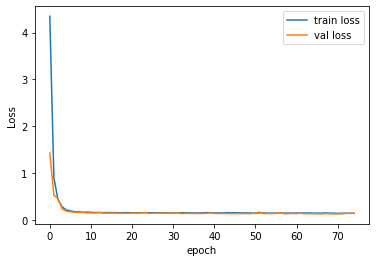

In [ ]:
plt.plot(mlp_history.history['loss'], label='train loss')
plt.plot(mlp_history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [ ]:
from sklearn import metrics
predicted = model_mlp.predict(X_test)
# Evaluating the model
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print('R-squared :', metrics.r2_score(y_test, predicted))

78/78 [==============================] - 0s 1ms/step
Root Mean Squared Error: 0.17739467968468098
R-squared : 0.08588408916261925


0.7847828525491223
AUC: 0.7848


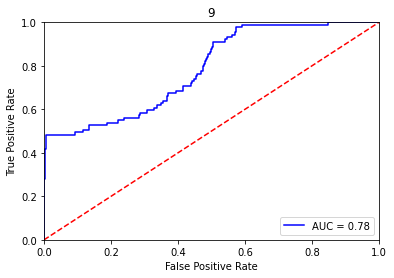

In [ ]:
#taken from net
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

pred= predicted

print(roc_auc_score(y_test, pred))

fpr, tpr, _ = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
print('AUC:', np.round(roc_auc,4))

plt.title('9')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [ ]:
predicted.shape
predicted

array([[0.02866199],
       [0.02035293],
       [0.02792135],
       ...,
       [0.0183316 ],
       [0.02401532],
       [0.02163913]], dtype=float32)

In [ ]:
a= np.reshape(predicted,2493,)
a.shape


(2493,)

In [ ]:
y_test.shape

(2493,)

In [ ]:
a

array([0.02866199, 0.02035293, 0.02792135, ..., 0.0183316 , 0.02401532,
       0.02163913], dtype=float32)

In [ ]:
for i in range(len(a)):
  if a[i]>0.5:
    a[i]=1
  else:
    a[i]=0

a 

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,a ))

[[2404    0]
 [  87    2]]


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, a).ravel()
print(classification_report(y_test, a))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2404
           1       1.00      0.02      0.04        89

    accuracy                           0.97      2493
   macro avg       0.98      0.51      0.51      2493
weighted avg       0.97      0.97      0.95      2493



### **CNN TRY DISCARDED **

In [ ]:
X_train_series = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_valid_series = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
print('Train set shape', X_train_series.shape)
print('Validation set shape', X_valid_series.shape)

Train set shape (5816, 7, 1)
Validation set shape (2493, 7, 1)


In [ ]:
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_series.shape[1], X_train_series.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))
model_cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['AUC'])
model_cnn.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 6, 64)             192       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 3, 64)            0         
 1D)                                                             
                                                                 
 dense_20 (Dense)            (None, 3, 50)             3250      
                                                                 
 dense_21 (Dense)            (None, 3, 1)              51        
                                                                 
Total params: 3,493
Trainable params: 3,493
Non-trainable params: 0
_________________________________________________________________


# **With dropout**

In [ ]:
model = Sequential()
model.add(Dense(750, kernel_regularizer=L1L2(l1=1e-3, l2=1e-1), activation="relu",input_shape=(7,)))
model.add(BatchNormalization())
model.add(Dense(512, kernel_regularizer=L1L2(l1=1e-3, l2=1e-1), activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(200,kernel_regularizer=L1L2(l1=1e-3, l2=1e-1), activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(60,kernel_regularizer=L1L2(l1=1e-3, l2=1e-1), activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(16,kernel_regularizer=L1L2(l1=1e-3, l2=1e-1), activation="relu"))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 750)               6000      
                                                                 
 batch_normalization_2 (Batc  (None, 750)              3000      
 hNormalization)                                                 
                                                                 
 dense_23 (Dense)            (None, 512)               384512    
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_24 (Dense)            (None, 200)               102600    
                                                                 
 dropout_9 (Dropout)         (None, 200)               0         
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['AUC'])

In [ ]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='loss', patience=5)
history1 =model.fit(X_train, y_train, validation_split=0.35, shuffle=True, epochs=100,batch_size=2000,callbacks=[callback])

Epoch 1/100
2/2 [==============================] - 2s 373ms/step - loss: 120.5614 - auc: 0.5367 - val_loss: 114.1572 - val_auc: 0.3369
Epoch 2/100
2/2 [==============================] - 0s 35ms/step - loss: 112.1658 - auc: 0.5176 - val_loss: 106.1372 - val_auc: 0.2831
Epoch 3/100
2/2 [==============================] - 0s 33ms/step - loss: 104.2461 - auc: 0.5319 - val_loss: 98.5767 - val_auc: 0.2839
Epoch 4/100
2/2 [==============================] - 0s 30ms/step - loss: 96.7667 - auc: 0.5263 - val_loss: 91.4435 - val_auc: 0.2906
Epoch 5/100
2/2 [==============================] - 0s 41ms/step - loss: 89.7103 - auc: 0.5142 - val_loss: 84.7265 - val_auc: 0.2933
Epoch 6/100
2/2 [==============================] - 0s 32ms/step - loss: 83.0698 - auc: 0.5536 - val_loss: 78.4160 - val_auc: 0.2935
Epoch 7/100
2/2 [==============================] - 0s 32ms/step - loss: 76.8403 - auc: 0.5313 - val_loss: 72.4982 - val_auc: 0.2963
Epoch 8/100
2/2 [==============================] - 0s 45ms/step - loss

78/78 [==============================] - 0s 2ms/step
0.7185566191179494
AUC: 0.7186


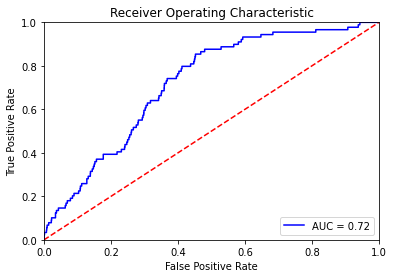

In [ ]:
#taken from net
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

pred= model.predict(X_test)

print(roc_auc_score(y_test, pred))

fpr, tpr, _ = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
print('AUC:', np.round(roc_auc,4))

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [ ]:
pred.shape

(2493, 1)

In [ ]:
a= np.reshape(pred,2493,)
a.shape


(2493,)

In [ ]:
y_test.shape

(2493,)

In [ ]:
a

array([0.09074515, 0.09095978, 0.09063679, ..., 0.09087703, 0.09069059,
       0.09070903], dtype=float32)

In [ ]:
for i in range(len(a)):
  if a[i]>0.5:
    a[i]=1
  else:
    a[i]=0

a 

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,a ))

[[2404    0]
 [  89    0]]


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, a).ravel()
print(classification_report(y_test, a))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2404
           1       0.00      0.00      0.00        89

    accuracy                           0.96      2493
   macro avg       0.48      0.50      0.49      2493
weighted avg       0.93      0.96      0.95      2493



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


predicting

In [ ]:
df_predict=eq_data_last_days_out
df_predict.shape
preds=model_mlp.predict(df_predict[req])

7/7 [==============================] - 0s 2ms/step


In [ ]:
live_set = df_predict[['time', 'place', 'latitude', 'longitude']]
live_set.loc[:,'quake'] = preds
live_set

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,time,place,latitude,longitude,quake
8422,2022-12-25,Indonesia,-4.326741,120.961696,0.087352
8423,2022-12-26,Indonesia,-4.326741,120.961696,0.157358
8424,2022-12-26,Indonesia,-4.326741,120.961696,0.110271
8425,2022-12-26,Indonesia,-4.326741,120.961696,0.092662
8426,2022-12-27,Indonesia,-4.326741,120.961696,0.112757
...,...,...,...,...,...
4214,2022-12-28,Hawaii,19.323136,-155.432647,0.022923
4215,2022-12-29,Hawaii,19.323136,-155.432647,0.022973
4216,2022-12-29,Hawaii,19.323136,-155.432647,0.023195
4217,2022-12-29,Hawaii,19.323136,-155.432647,0.023414


In [ ]:
#grouping it
live_set = live_set.groupby(['time', 'place'], as_index=False).mean()
live_set


,time,place,latitude,longitude,quake
0,2022-12-12,Wyoming,44.618443,-110.710206,0.017384
1,2022-12-13,Montana,44.670475,-110.771956,0.017734
2,2022-12-14,Philippines,9.839407,124.550621,0.039928
3,2022-12-15,Montana,44.670475,-110.771956,0.017753
4,2022-12-15,Wyoming,44.618443,-110.710206,0.017377
...,...,...,...,...,...
107,2022-12-29,CA,37.164319,-120.729274,0.018311
108,2022-12-29,Hawaii,19.323136,-155.432647,0.023301
109,2022-12-29,Japan,34.927714,137.481951,0.033947
110,2022-12-29,Nevada,37.951228,-117.562362,0.017721


In [ ]:
# increment date to include DAYS_OUT_TO_PREDICT
live_set['time']= pd.to_datetime(live_set['time'],format='%Y-%m-%d') 
live_set['time'] = live_set['time'] + pd.to_timedelta(9,unit='d')

live_set

,time,place,latitude,longitude,quake
0,2022-12-21,Wyoming,44.618443,-110.710206,0.017384
1,2022-12-22,Montana,44.670475,-110.771956,0.017734
2,2022-12-23,Philippines,9.839407,124.550621,0.039928
3,2022-12-24,Montana,44.670475,-110.771956,0.017753
4,2022-12-24,Wyoming,44.618443,-110.710206,0.017377
...,...,...,...,...,...
107,2023-01-07,CA,37.164319,-120.729274,0.018311
108,2023-01-07,Hawaii,19.323136,-155.432647,0.023301
109,2023-01-07,Japan,34.927714,137.481951,0.033947
110,2023-01-07,Nevada,37.951228,-117.562362,0.017721


In [ ]:
import datetime as dt
# giving out predictions from today
days = list(set([d for d in live_set['time'].astype(str) if d > dt.datetime.today().strftime('%Y-%m-%d')]))
days.sort()

# Predict NaN outcome value in earthquake for next day 1.
predict_day=days[1]
predict_day
z=pd.DataFrame (days, columns = ['time'])
z
z['time']= pd.to_datetime(z['time'],format='%Y-%m-%d') 

In [ ]:
answer=pd.merge(left=live_set, right=z, how='inner', on=['time'])
answer

,time,place,latitude,longitude,quake
0,2022-12-30,Canada,55.241717,-124.096827,0.018518
1,2022-12-30,New Mexico,31.824800,-104.400837,0.018953
2,2022-12-30,Oklahoma,35.632954,-97.744196,0.017842
3,2022-12-30,Oregon,43.930089,-122.317987,0.017359
4,2022-12-30,Papua New Guinea,-4.949803,148.066951,0.741165
...,...,...,...,...,...
82,2023-01-07,CA,37.164319,-120.729274,0.018311
83,2023-01-07,Hawaii,19.323136,-155.432647,0.023301
84,2023-01-07,Japan,34.927714,137.481951,0.033947
85,2023-01-07,Nevada,37.951228,-117.562362,0.017721


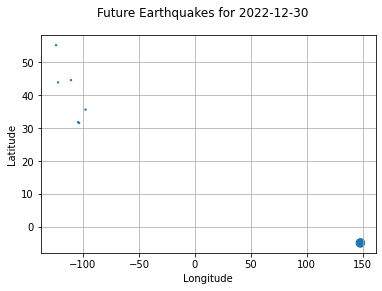

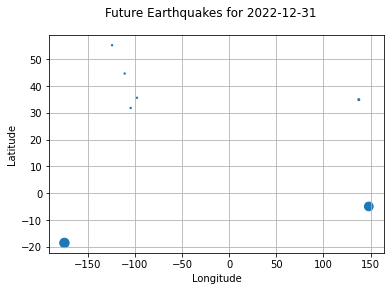

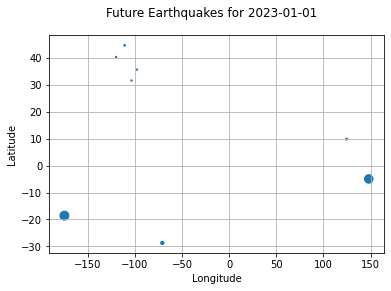

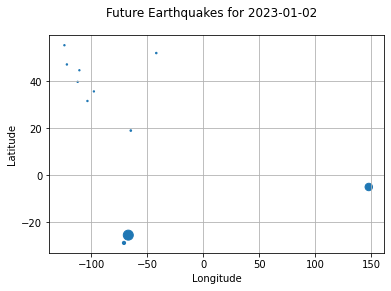

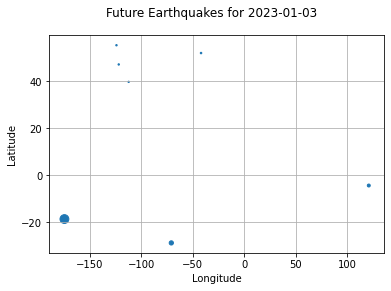

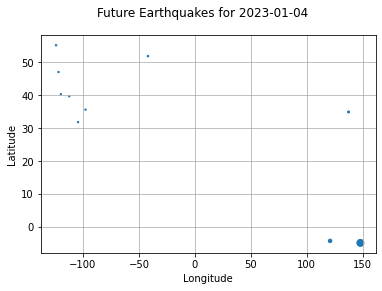

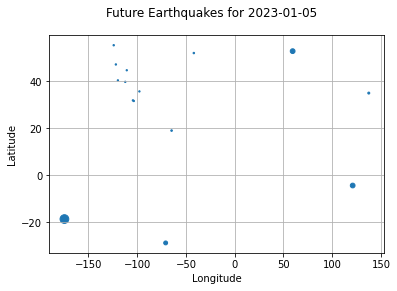

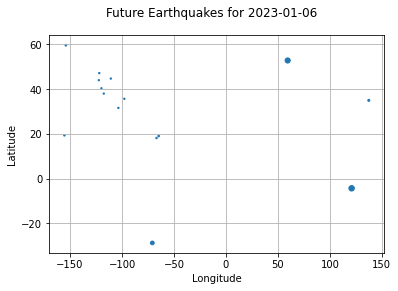

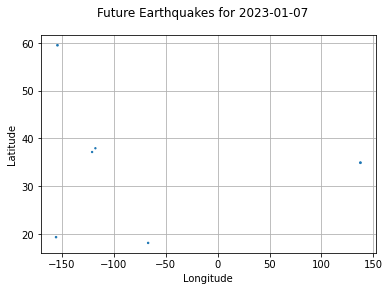

In [ ]:
#internet
for i in range(0,9):
    live_set_tmp = live_set[live_set['time'] == days[i]]
    plt.scatter(live_set_tmp['longitude'], live_set_tmp['latitude'], s=(live_set_tmp['quake'] * 100))
    plt.suptitle('Future Earthquakes for ' + days[i])
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid()
    plt.show()

In [ ]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import folium
from folium import Choropleth
from folium.plugins import HeatMap


#internet
#Reference for plot https://python-visualization.github.io/folium/quickstart.html & https://www.kaggle.com/code/cwthompson/volcano-making-a-map-of-volcanoes-using-folium/notebook

for i in range(0,9):
    live_set_tmp = live_set[live_set['time'] == days[i]]
    volcano_map = folium.Map()
    for i in range(0, live_set_tmp.shape[0]):
      volcano = live_set_tmp.iloc[i]
      folium.Marker([volcano['latitude'], volcano['longitude']], popup=volcano['place']).add_to(volcano_map)
    print(live_set_tmp['time'])
    display(volcano_map)






25   2022-12-30
26   2022-12-30
27   2022-12-30
28   2022-12-30
29   2022-12-30
30   2022-12-30
31   2022-12-30
Name: time, dtype: datetime64[ns]


32   2022-12-31
33   2022-12-31
34   2022-12-31
35   2022-12-31
36   2022-12-31
37   2022-12-31
38   2022-12-31
Name: time, dtype: datetime64[ns]


39   2023-01-01
40   2023-01-01
41   2023-01-01
42   2023-01-01
43   2023-01-01
44   2023-01-01
45   2023-01-01
46   2023-01-01
47   2023-01-01
Name: time, dtype: datetime64[ns]


48   2023-01-02
49   2023-01-02
50   2023-01-02
51   2023-01-02
52   2023-01-02
53   2023-01-02
54   2023-01-02
55   2023-01-02
56   2023-01-02
57   2023-01-02
58   2023-01-02
Name: time, dtype: datetime64[ns]


59   2023-01-03
60   2023-01-03
61   2023-01-03
62   2023-01-03
63   2023-01-03
64   2023-01-03
65   2023-01-03
Name: time, dtype: datetime64[ns]


66   2023-01-04
67   2023-01-04
68   2023-01-04
69   2023-01-04
70   2023-01-04
71   2023-01-04
72   2023-01-04
73   2023-01-04
74   2023-01-04
75   2023-01-04
Name: time, dtype: datetime64[ns]


76   2023-01-05
77   2023-01-05
78   2023-01-05
79   2023-01-05
80   2023-01-05
81   2023-01-05
82   2023-01-05
83   2023-01-05
84   2023-01-05
85   2023-01-05
86   2023-01-05
87   2023-01-05
88   2023-01-05
89   2023-01-05
90   2023-01-05
Name: time, dtype: datetime64[ns]


91    2023-01-06
92    2023-01-06
93    2023-01-06
94    2023-01-06
95    2023-01-06
96    2023-01-06
97    2023-01-06
98    2023-01-06
99    2023-01-06
100   2023-01-06
101   2023-01-06
102   2023-01-06
103   2023-01-06
104   2023-01-06
105   2023-01-06
Name: time, dtype: datetime64[ns]


106   2023-01-07
107   2023-01-07
108   2023-01-07
109   2023-01-07
110   2023-01-07
111   2023-01-07
Name: time, dtype: datetime64[ns]


In [ ]:
model1=model_mlp
model1.save

<bound method Model.save of <keras.engine.sequential.Sequential object at 0x7f9fd8142c40>>

In [ ]:
model2=model
model2.save

<bound method Model.save of <keras.engine.sequential.Sequential object at 0x7f9fc9212250>>

#Overfitting

In [ ]:
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.regularizers import L1L2
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten,BatchNormalization,Dropout



overfitt_mlp = Sequential()
overfitt_mlp.add(Dense(80, activation='relu', input_dim=X_train.shape[1]))
overfitt_mlp.add(Dense(20, activation='relu'))
overfitt_mlp.add(Dense(1, activation='sigmoid'))
overfitt_mlp.compile(optimizer='adam',loss='binary_crossentropy',metrics=['AUC'])
overfitt_mlp.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 80)                640       
                                                                 
 dense_32 (Dense)            (None, 20)                1620      
                                                                 
 dense_33 (Dense)            (None, 1)                 21        
                                                                 
Total params: 2,281
Trainable params: 2,281
Non-trainable params: 0
_________________________________________________________________


In [ ]:

overfitt_mlp_hist = overfitt_mlp.fit(X_train.values, y_train, validation_data=(X_test.values, y_test), epochs=10, verbose=1)
#10 epochs is good
#15 is questionable

Epoch 1/10
182/182 [==============================] - 2s 6ms/step - loss: 0.3497 - auc: 0.2730 - val_loss: 0.2539 - val_auc: 0.2208
Epoch 2/10
182/182 [==============================] - 1s 4ms/step - loss: 0.2336 - auc: 0.3006 - val_loss: 0.2309 - val_auc: 0.2981
Epoch 3/10
182/182 [==============================] - 1s 5ms/step - loss: 0.2019 - auc: 0.4830 - val_loss: 0.1752 - val_auc: 0.4801
Epoch 4/10
182/182 [==============================] - 1s 5ms/step - loss: 0.1693 - auc: 0.6612 - val_loss: 0.1781 - val_auc: 0.8267
Epoch 5/10
182/182 [==============================] - 1s 5ms/step - loss: 0.1364 - auc: 0.7909 - val_loss: 0.1106 - val_auc: 0.8899
Epoch 6/10
182/182 [==============================] - 1s 5ms/step - loss: 0.1071 - auc: 0.9098 - val_loss: 0.1229 - val_auc: 0.8415
Epoch 7/10
182/182 [==============================] - 1s 6ms/step - loss: 0.1083 - auc: 0.8813 - val_loss: 0.1140 - val_auc: 0.8897
Epoch 8/10
182/182 [==============================] - 2s 9ms/step - loss: 0.

In [ ]:
overfitt_mlp.evaluate(X_test, y_test)

78/78 [==============================] - 1s 5ms/step - loss: 0.0649 - auc: 0.9641


[0.06492216885089874, 0.9640814065933228]

In [ ]:
y_test.shape

(2493,)

In [ ]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs1 = overfitt_mlp.predict(X_test, verbose=0)
# reduce to 1d array
yhat_probs1 = yhat_probs1[:, 0]

var = explained_variance_score(y_test.values.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(y_test.values.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)


Variance: 0.089679
R2 Score: 0.089679


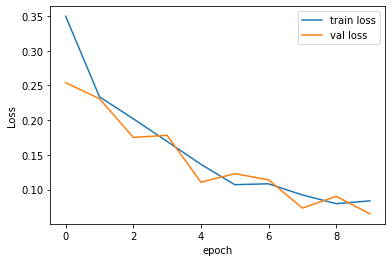

In [ ]:
plt.plot(overfitt_mlp_hist.history['loss'], label='train loss')
plt.plot(overfitt_mlp_hist.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()